In [96]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
key = '5e6bbd0e3991e4888a436338a938fd961cd835ca'

In [97]:
df = pdr.get_data_tiingo('AMZN',api_key=key)

In [163]:
df.to_csv('AMZN.csv')
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2017-02-10,827.46,828.0000,822.8500,823.82,2429609,827.46,828.0000,822.8500,823.82,2429609,0.0,1.0
1,AMZN,2017-02-13,836.53,842.9999,828.5500,831.62,4172618,836.53,842.9999,828.5500,831.62,4172618,0.0,1.0
2,AMZN,2017-02-14,836.39,838.3100,831.4522,837.00,2792442,836.39,838.3100,831.4522,837.00,2792442,0.0,1.0
3,AMZN,2017-02-15,842.70,842.8100,832.8200,834.00,2968853,842.70,842.8100,832.8200,834.00,2968853,0.0,1.0
4,AMZN,2017-02-16,844.14,845.0000,839.3750,841.84,2714667,844.14,845.0000,839.3750,841.84,2714667,0.0,1.0


In [167]:
df['date'] = pd.to_datetime(df['date']).dt.date
df=pd.read_csv('AMZN.csv', usecols = ['date','close'])
df.head()

,date,close
0,2017-02-10 00:00:00+00:00,827.46
1,2017-02-13 00:00:00+00:00,836.53
2,2017-02-14 00:00:00+00:00,836.39
3,2017-02-15 00:00:00+00:00,842.70
4,2017-02-16 00:00:00+00:00,844.14


In [187]:
df1 = df.reset_index()['close']

In [188]:
df1.head()

0    827.46
1    836.53
2    836.39
3    842.70
4    844.14
Name: close, dtype: float64

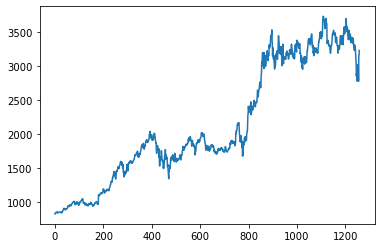

In [177]:
df1.shape
plt.plot(df1)

In [102]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [103]:
df1.shape

(1258, 1)

In [104]:
print(df1)

[[0.        ]
 [0.00312333]
 [0.00307512]
 ...
 [0.80074726]
 [0.80278586]
 [0.82673944]]


In [152]:
# Splitting data into train and test
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1),:1]

In [153]:
training_size

880

In [107]:
#Converting array to matrix dataset
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        temp = dataset[i:(i+time_step),0]
        dataX.append(temp)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)
        

In [108]:
time_step = 150
X_train,Y_train = create_dataset(train_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)

In [110]:
print(len(X_train))

855


In [111]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [113]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 150, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 150, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=150,batch_size=450,verbose=1)

Epoch 1/150
14/14 [==============================] - 2s 124ms/step - loss: 3.3255e-04 - val_loss: 0.0020
Epoch 2/150
14/14 [==============================] - 2s 126ms/step - loss: 3.2591e-04 - val_loss: 0.0010
Epoch 3/150
14/14 [==============================] - 2s 119ms/step - loss: 2.7342e-04 - val_loss: 8.3435e-04
Epoch 4/150
14/14 [==============================] - 2s 119ms/step - loss: 2.5128e-04 - val_loss: 7.5495e-04
Epoch 5/150
14/14 [==============================] - 2s 123ms/step - loss: 2.6348e-04 - val_loss: 9.9526e-04
Epoch 6/150
14/14 [==============================] - 2s 142ms/step - loss: 2.7983e-04 - val_loss: 8.5660e-04
Epoch 7/150
14/14 [==============================] - 2s 130ms/step - loss: 2.6651e-04 - val_loss: 0.0011
Epoch 8/150
14/14 [==============================] - 2s 139ms/step - loss: 2.8458e-04 - val_loss: 0.0015
Epoch 9/150
14/14 [==============================] - 2s 145ms/step - loss: 2.7787e-04 - val_loss: 6.7900e-04
Epoch 10/150
14/14 [===============

In [145]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [146]:
import math
from statistics import mean
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(Y_train,train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test,test_predict))
print('Train RMSE: %.3f' % train_rmse)
print('Test RMSE: %.3f' % test_rmse)

Train RMSE: 0.016
Test RMSE: 0.035


In [147]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

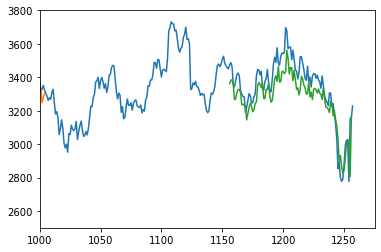

In [148]:
# Plotting train data and shifting it by the timesteps
look_back=150
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

# Plotting test data
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

# Plotting original data csv

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.axis([1000, 1275, 2500, 3800])
plt.show()

In [179]:
len(test_data)
len(df)

1258

0       2017-02-10 00:00:00+00:00
1       2017-02-13 00:00:00+00:00
2       2017-02-14 00:00:00+00:00
3       2017-02-15 00:00:00+00:00
4       2017-02-16 00:00:00+00:00
                  ...            
1253    2022-02-02 00:00:00+00:00
1254    2022-02-03 00:00:00+00:00
1255    2022-02-04 00:00:00+00:00
1256    2022-02-07 00:00:00+00:00
1257    2022-02-08 00:00:00+00:00
Name: date, Length: 1258, dtype: object


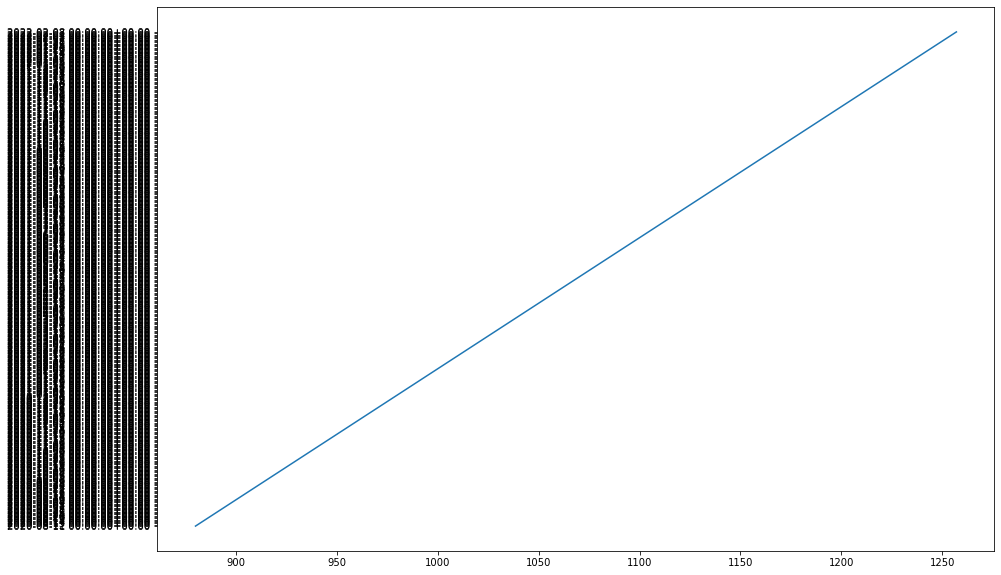

In [189]:
dates = pd.read_csv('AMZN.csv', usecols = ['date'])
dates = dates.reset_index()['date']
print(dates)
plt.figure(figsize=(15,10))
plt.plot(dates[880:], label="Actual")
#plt.plot(testPredictPlot)
